## Introduction

Paragraph

## Importing and Cleaning Data

In this step, we will import the raw data from the kc_house_data.csv.   
In our initial look, we will dive into the column types, missing data,  
and duplicate entries.

Once we fix any error the raw data might cause, we will export the 'cleaned'  
data onto a different .csv file for future work.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style='darkgrid')

In [2]:
#importing csv to dataframe
df = pd.read_csv('data\kc_house_data.csv')

>importing the raw data from 'data\kc_house_data.csv' file

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


> After importing the raw data, our first observation reveals that we are missing values in 'waterfront', 'view', and 'yr_renovated'. 

>The columns 'price', 'waterfront', 'view', 'yr_renovated' are all floats and 'sqft_basement' is a string all opposed to being integers that we can work with.

In [4]:
#filling the nan's with 0, all is categorical columns with the mode being 0.0
df['waterfront'] = df['waterfront'].fillna(0.0)
df['view'] = df['view'].fillna(0.0)
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

df.loc[df['sqft_basement'] == '?'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float).astype(int)

In [5]:
#changing columns from float to int
col_floats = ['price', 'waterfront', 'view', 'yr_renovated']
for col in col_floats:
    df[col] = df[col].astype(int)

In [6]:
#expanding the date column to a column for each month and year
df['date'] = pd.to_datetime(df['date'])
df['month_sold'] = df['date'].dt.month
df['year_sold'] = df['date'].dt.year

In [7]:
#creating seasonal columns
df['sold_spring_time'] = df['month_sold'] < 4
df['sold_summer_time'] = (df['month_sold'] > 3) & (df['month_sold'] < 7)
df['sold_fall_time'] = (df['month_sold'] > 6) & (df['month_sold'] < 10)
df['sold_winter_time'] = (df['month_sold'] > 9) & (df['month_sold'] < 13)

df['sold_spring_time'] = df['sold_spring_time'].astype(bool).astype(int)
df['sold_summer_time'] = df['sold_summer_time'].astype(bool).astype(int)
df['sold_fall_time'] = df['sold_fall_time'].astype(bool).astype(int)
df['sold_winter_time'] = df['sold_winter_time'].astype(bool).astype(int)

In [8]:
#converting 'yr_renovated' and 'sqft_basement' into a boolean
df['has_renovated'] = df['yr_renovated'].astype(bool).astype(int)
df['has_basement'] = df['sqft_basement'].astype(bool).astype(int)

In [9]:
#deleting columns not neccesary in dataframe
df.drop('date', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
price               21597 non-null int32
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
waterfront          21597 non-null int32
view                21597 non-null int32
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
sqft_basement       21597 non-null int32
yr_built            21597 non-null int64
yr_renovated        21597 non-null int32
zipcode             21597 non-null int64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
month_sold          21597 non-null int64
year_sold           21597 non-null int64
sold_spring_time    21

> the above table verifies that the data set is voided of any missing data.

> there are changes the data types on some of the columns to prep for work.


> Side note: we did also check for duplicated rows that leads to redundancies.


In [11]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,month_sold,year_sold,sold_spring_time,sold_summer_time,sold_fall_time,sold_winter_time,has_renovated,has_basement
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,...,1340,5650,10,2014,0,0,0,1,0,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,...,1690,7639,12,2014,0,0,0,1,1,1
2,180000,2,1.00,770,10000,1.0,0,0,3,6,...,2720,8062,2,2015,1,0,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,...,1360,5000,12,2014,0,0,0,1,0,1
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,...,1800,7503,2,2015,1,0,0,0,0,0


> After cleaning the raw data, a new .csv file was created to act as a save point.

> This new .csv file is the same as the original except with the missing data being filled and data types being changed  appropriately.

In [13]:
# exports a clean version of raw data.
df.to_csv('data\Cleaned_raw_kc_house_data.csv')

## EDA and Scrubbing

In this step of the process, we will look into every column  
for any outliers and/or any other odd extremities.

This step is a huge factor when it comes down to the "fit"  
or accuracy of our model

This is also where we start making decisions on what kind of data  
should belong into our model.

### price

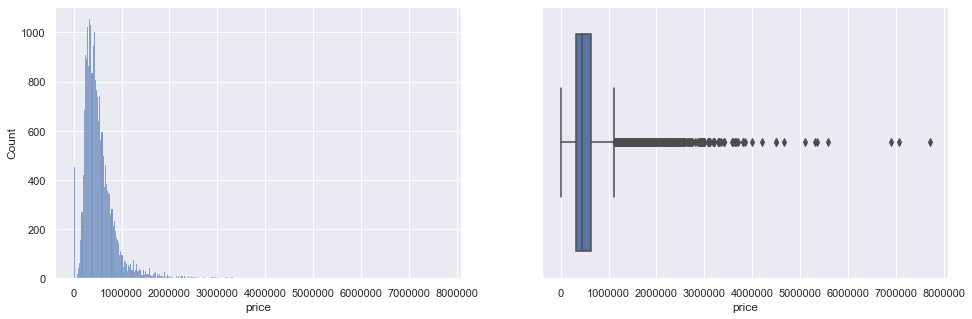

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

#looking for potential outliars
sns.histplot(data=df, x='price', ax = ax[0])
sns.boxplot(data=df, x='price', ax=ax[1]);

In [15]:
#Making the 'price' benchmark between $150,000 to $710,000
df.drop(df[df['price'] > 710000].index, inplace = True)
df.drop(df[df['price'] < 150000].index, inplace = True)

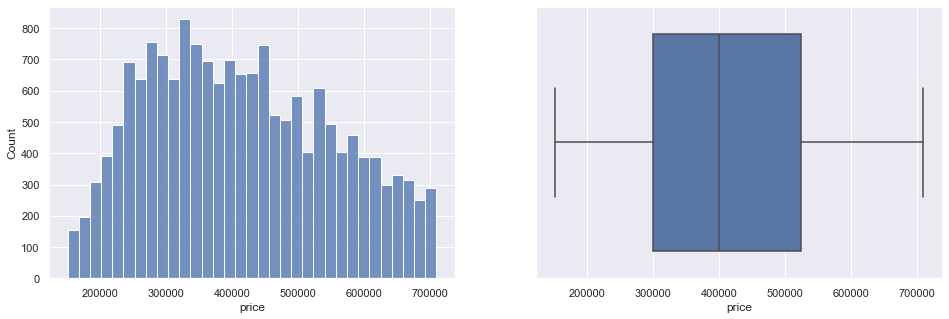

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='price', ax = ax[0])
sns.boxplot(data=df, x='price', ax=ax[1]);

>The histogram and boxplot looks to be more normally distributed after removing outliers

### bedrooms

In [18]:
df['bedrooms'].value_counts()

3     8435
4     4686
2     2477
5      908
1      170
6      151
7       17
8        7
9        3
10       2
11       1
33       1
Name: bedrooms, dtype: int64

>the table above points out the outliers in our data set on how many bedrooms each house have

In [19]:
df.drop(df[df['bedrooms'] > 6].index, inplace = True)

In [20]:
df['bedrooms'].value_counts()

3    8435
4    4686
2    2477
5     908
1     170
6     151
Name: bedrooms, dtype: int64

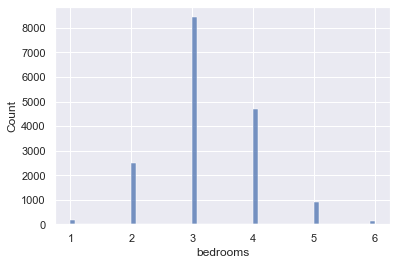

In [21]:
sns.histplot(data = df, x='bedrooms');

### bathrooms

In [23]:
df['bathrooms'].value_counts()

2.50    4134
1.00    3512
1.75    2713
2.00    1696
2.25    1660
1.50    1300
2.75     738
3.00     453
3.50     257
3.25     218
0.75      62
3.75      25
4.00      20
4.50      17
1.25       7
4.25       6
5.00       3
4.75       2
0.50       2
5.25       2
Name: bathrooms, dtype: int64

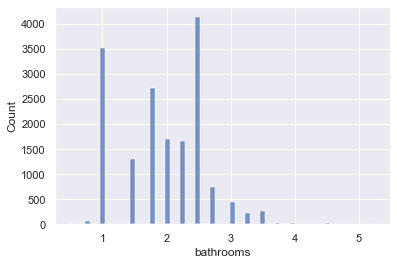

In [24]:
sns.histplot(data=df, x = 'bathrooms');

> the above table points out the outliers in our data-set on how many bathrooms each house in set have

In [25]:
df.drop(df[df['bathrooms'] > 4].index, inplace = True)
df.drop(df[df['bathrooms'] < 0.75].index, inplace = True)

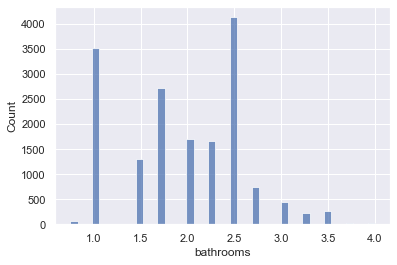

In [26]:
sns.histplot(data=df, x = 'bathrooms');

### sqft_living

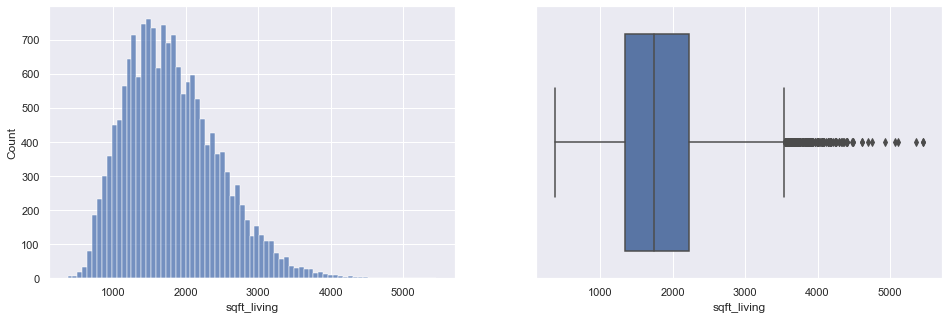

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living', ax = ax[0])
sns.boxplot(data=df, x='sqft_living', ax=ax[1]);

In [29]:
df.drop(df[df['sqft_living'] > 4500].index, inplace = True)

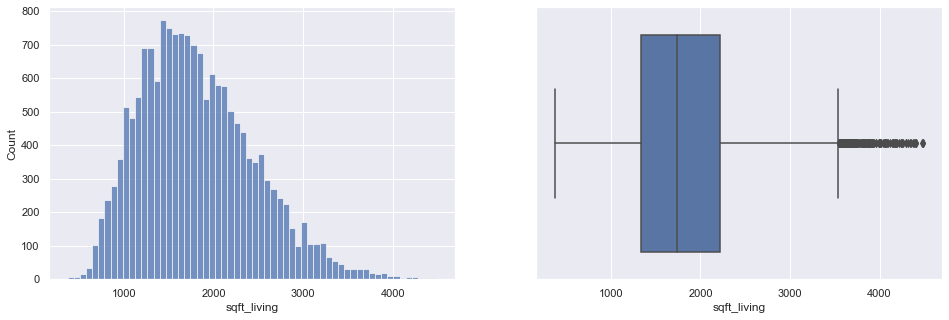

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living', ax = ax[0])
sns.boxplot(data=df, x='sqft_living', ax=ax[1]);

### sqft_lot

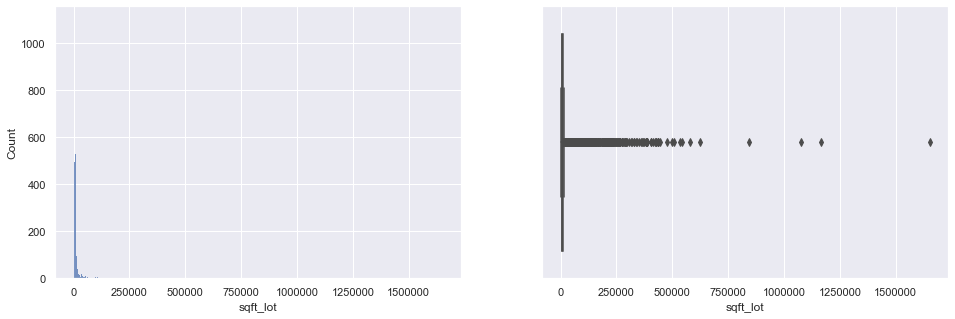

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot', ax=ax[1]);

In [32]:
#df.drop(df[df['sqft_lot'] > 17500].index, inplace = True)
df.drop(df[df['sqft_lot'] > 14000].index, inplace = True)

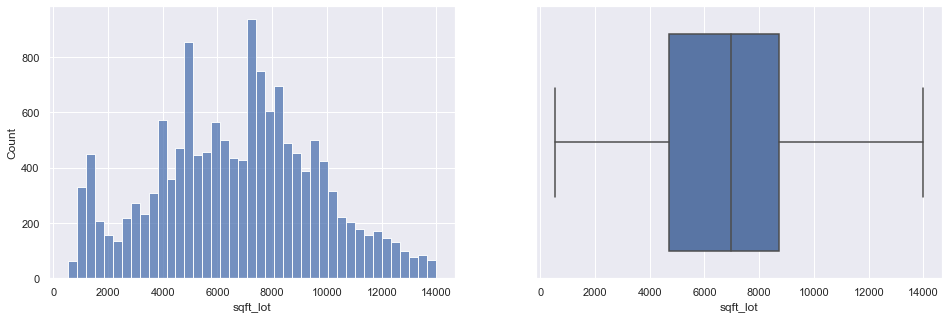

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot', ax=ax[1]);

In [35]:
df['sqft_lot'].describe()

count    14520.000000
mean      6731.364945
std       2948.908855
min        520.000000
25%       4686.500000
50%       6983.000000
75%       8720.000000
max      14000.000000
Name: sqft_lot, dtype: float64

### sqft_basement

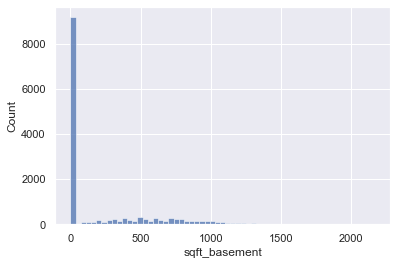

In [37]:
sns.histplot(data=df, x='sqft_basement');

In [38]:
df.drop(df[df['sqft_basement'] > 1300].index, inplace=True)

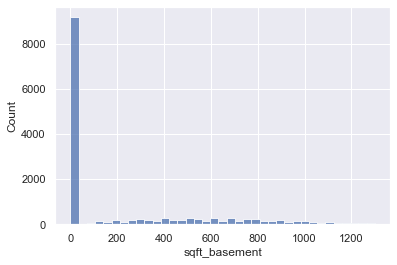

In [39]:
sns.histplot(data = df, x='sqft_basement');

#### is_basement

In [40]:
df['has_basement'].describe()

count    14385.000000
mean         0.362808
std          0.480827
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: has_basement, dtype: float64

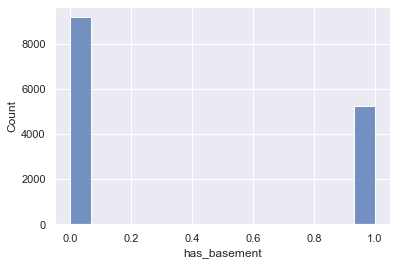

In [41]:
sns.histplot(data = df, x='has_basement');

### floors

In [45]:
df['floors'].value_counts()

1.0    7794
2.0    4823
1.5    1223
3.0     481
2.5      58
3.5       6
Name: floors, dtype: int64

In [46]:
df.drop(df[df['floors'] > 3].index, inplace=True)

In [47]:
df['floors'].value_counts()

1.0    7794
2.0    4823
1.5    1223
3.0     481
2.5      58
Name: floors, dtype: int64

### grade and condition

In [48]:
df['grade'].value_counts()

7     7442
8     4094
6     1689
9      889
5      145
10     107
4       10
11       2
3        1
Name: grade, dtype: int64

In [49]:
df['condition'].value_counts()

3    9477
4    3719
5    1063
2     107
1      13
Name: condition, dtype: int64

### sqft_lot15

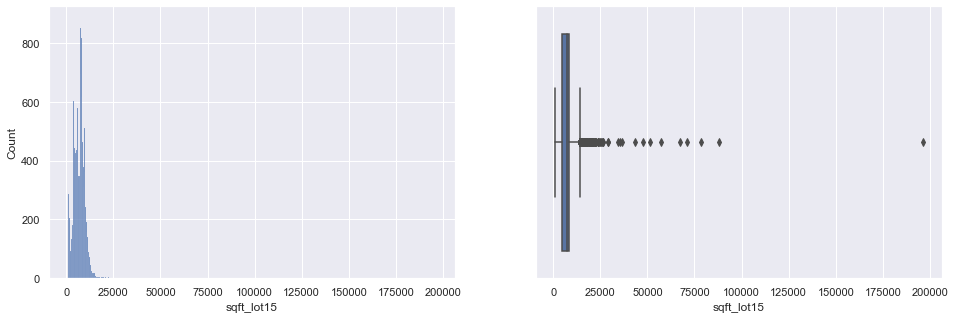

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot15', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot15', ax=ax[1]);

In [51]:
df.drop(df[df['sqft_lot15'] > 25000].index, inplace=True)

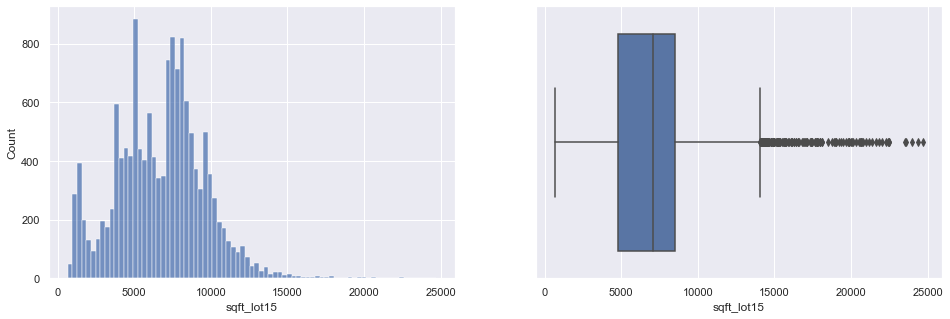

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_lot15', ax = ax[0])
sns.boxplot(data=df, x='sqft_lot15', ax=ax[1]);

### sqft_living15

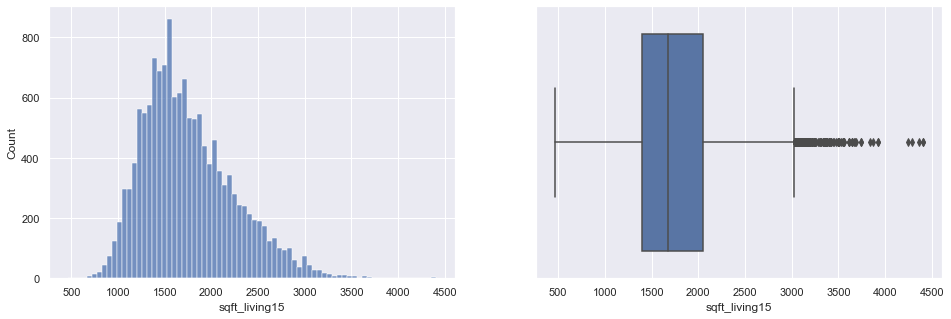

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=df, x='sqft_living15', ax = ax[0])
sns.boxplot(data=df, x='sqft_living15', ax=ax[1]);

### date

In [55]:
df['year_sold'].value_counts()

2014    9682
2015    4679
Name: year_sold, dtype: int64

> deleting year_sold for not having much of a recording

In [56]:
df.drop('year_sold', axis=1, inplace=True)

### waterfront

In [57]:
df['waterfront'].value_counts()

0    14354
1        7
Name: waterfront, dtype: int64

In [58]:
df.drop('waterfront', axis=1, inplace=True)

### zipcode

C:\Users\Deric\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


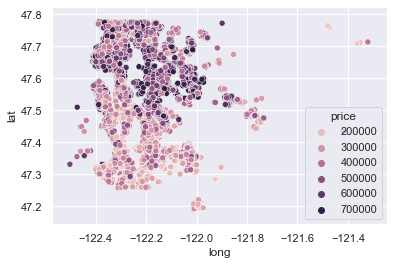

In [59]:
sns.scatterplot(df.long, df.lat, hue=df.price);

In [60]:
frequency = df.groupby('zipcode')['price'].count()
frequency

zipcode
98001    255
98002    177
98003    238
98004     26
98005     48
        ... 
98177    171
98178    221
98188    110
98198    215
98199    167
Name: price, Length: 69, dtype: int64

In [61]:
mean = df.groupby('zipcode').mean()['price']
mean

zipcode
98001    271486.043137
98002    237994.197740
98003    279574.924370
98004    630238.461538
98005    591872.312500
             ...      
98177    483843.245614
98178    289987.294118
98188    280101.045455
98198    275968.079070
98199    538573.155689
Name: price, Length: 69, dtype: float64

In [62]:
cluster = pd.concat([frequency, mean], axis=1)
cluster

,price,price
zipcode,,
98001,255,271486.043137
98002,177,237994.197740
98003,238,279574.924370
98004,26,630238.461538
98005,48,591872.312500
...,...,...
98177,171,483843.245614
98178,221,289987.294118
98188,110,280101.045455


In [63]:
cluster['zipcode'] = cluster.index

In [64]:
cluster.columns = ['frequency','price', 'zipcode']
cluster.describe()

,frequency,price,zipcode
count,69.000000,69.000000,69.000000
mean,208.130435,419129.158868,98077.855072
std,126.780138,113929.160608,56.845062
min,16.000000,237994.197740,98001.000000
25%,114.000000,305616.090909,98029.000000
50%,210.000000,423468.496815,98070.000000
75%,263.000000,512619.479070,98118.000000
max,465.000000,630858.444444,98199.000000


In [65]:
# creating "cheap" group that sell below mean price(454585)
cluster_cheap = cluster[cluster.price < 454585]

# temporary cluster of the houses that sell above mean price
cluster_temp = cluster[cluster.price >= 454585]

# creating "low volume, higher priced" group that sell less frequently than the mean
cluster_cheap_low_volume = cluster_cheap[cluster_cheap.frequency < 330]

# creating "high volume, higher priced" group that sell more frequently than the mean
cluster_cheap_high_volume = cluster_cheap[cluster_cheap.frequency >= 330]

# creating "low volume, higher priced" group that sell less frequently than the mean
cluster_expensive_low_volume = cluster_temp[cluster_temp.frequency < 278]

# creating "high volume, higher priced" group that sell more frequently than the mean
cluster_expensive_high_volume = cluster_temp[cluster_temp.frequency >= 280]

In [66]:
def get_zipcode_category(zipcode):
    if zipcode in cluster_cheap_low_volume.index:
        return 'cheap_low_volume'
    elif zipcode in cluster_cheap_high_volume.index:
        return 'cheap_high_volume'
    elif zipcode in cluster_expensive_low_volume.index:
        return 'expensive_low_volume'
    else:
        return 'expensive_high_volume'

In [67]:
df['zipcode_type'] = df.zipcode.apply(get_zipcode_category)
df.zipcode_type.value_counts() # viewing how our clusters look

cheap_low_volume         4926
cheap_high_volume        4043
expensive_low_volume     3768
expensive_high_volume    1624
Name: zipcode_type, dtype: int64

## Continuous and Categorical Features

### Multi-collineary 

In [68]:
df_cont = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
              'lat', 'long', 'sqft_living15', 'sqft_lot15']]

data_cont = df_cont.corr().abs().stack().reset_index().sort_values(0, ascending=False)
data_cont['pairs'] = list(zip(data_cont.level_0, data_cont.level_1))
data_cont.set_index(['pairs'], inplace=True)
data_cont.drop(columns=['level_1', 'level_0'], inplace = True)
data_cont.columns = ['cc']
data_cont.drop_duplicates(inplace=True)
data_cont[(data_cont.cc>.70) & (data_cont.cc<1)]

,cc
pairs,
"(sqft_lot, sqft_lot15)",0.866243
"(sqft_living, sqft_above)",0.829318
"(sqft_living15, sqft_living)",0.711847


>Above table are showing some highly correlated continuous columns. We'll be dropping 'sqft_above', 'sqft_living15', and 'sqft_lot15' due to high correlation that will lead to fallacy in our model.

In [69]:
#creating seperate dataframe from the original to make changes
df_b = df

In [70]:
#dropping the multicollinearies and unwanted columns
df_b.drop('lat', axis = 1, inplace = True)
df_b.drop('long', axis = 1, inplace = True)
df_b.drop('sqft_above', axis = 1, inplace = True)
df_b.drop('sqft_living15', axis = 1, inplace = True)
df_b.drop('sqft_lot15', axis = 1, inplace = True)

> We are dropping 'lat' and 'long' columns because we'll be using zipcode instead. As well as dropping the 'view' columns because we believe it's not a big determining factor for house prices.

### Categorical / One Hot Encoded

In [ ]:
#looking at graphs to see columns shaped like a categorical data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,10), sharey=True)

feats = ['condition', 'grade', 'zipcode_type']

for col, ax in zip(feats, axes.flatten()):
    (df.groupby(col)               
         .mean()['price']        
         .sort_values()              
         .plot
         .bar(ax=ax))                
    
    ax.set_title(col)                
fig.tight_layout()

In [ ]:
features = df[feats].astype('category')

In [ ]:
feats_ohe = pd.get_dummies(features, drop_first = True)

In [ ]:
feats_ohe = feats_ohe.astype(int)

In [ ]:
feats_ohe.head()

### Baseline DataFrame

> Adding the new features to the baseline data

In [ ]:
df_b = pd.concat([df_b, feats_ohe], axis = 1)

In [ ]:
df_b.columns

> dropping more unwanted columns from our baseline DataFrame

In [ ]:
#dropping unwanted columns first
df_b.drop('view', axis = 1, inplace = True)
df_b.drop('yr_renovated', axis = 1, inplace = True)
df_b.drop('sqft_basement', axis = 1, inplace = True)

>Dropping 'condition', 'grade', and 'zipcode' since they're replaced with one hot encoded features

In [ ]:
df_b.drop('condition', axis = 1, inplace = True)
df_b.drop('grade', axis = 1, inplace = True)
df_b.drop('zipcode', axis = 1, inplace = True)

In [ ]:
df_b.drop('zipcode_type', axis = 1, inplace = True)

In [ ]:
#checking to see the new dataset and ensuring that there is no missing values
df_b.head()

In [ ]:
df_b.info()

## First Model - Baseline


### Train-Test Split

In [ ]:
#importing the necessary libraries for train-test split
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()

In [ ]:
y = df_b[['price']]
X = df_b.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [ ]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [ ]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

###  model

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
# Fitting the actual model
outcome = 'price'
dftrain = pd.concat([X_train, y_train], axis = 1)

predictors = '+'.join(X.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

R-squared: 0.826

Adj R-squared: 0.825

Number of significant p_values: 13

### Checking QQ Plot

In [ ]:
import statsmodels.api as sm

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Checking for Homoscedasticity

In [ ]:
plt.scatter(model.predict(dftrain[X.columns]), model.resid)
plt.plot(model.predict(dftrain[X.columns]), [0 for i in range(len(dftrain))])

## Second Model - Multicollinearies

### checking and fixing multicollinearies

In [ ]:
#Importing variance inflation factor to check for multicollinearies 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
col = df_b[X.columns]
vif = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]
list(zip(X.columns, vif))

In [ ]:
vif_scores = list(zip(X.columns, vif))
v_test = [x for x, vif in vif_scores if vif > 10]
print(len(vif_scores), len(v_test))

In [ ]:
v_test

In [ ]:
for v in v_test:
    dftrain.drop(v, axis=1, inplace=True)

In [ ]:
dftrain.drop('condition_2', axis = 1, inplace = True)

In [ ]:
dftrain.info()

### Train-Test Split

In [ ]:
y = dftrain[['price']]
X = dftrain.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [ ]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [ ]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

### model

In [ ]:
updf_b = dftrain.drop(['price'], axis=1)
predictors = '+'.join(updf_b.columns)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

### QQ Plot

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Homoscedasticity

In [ ]:
plt.scatter(model.predict(dftrain[updf_b.columns]), model.resid)
plt.plot(model.predict(dftrain[updf_b.columns]), [0 for i in range(len(dftrain))]);

## Third Model - P_Values

### finding and fixing high p_values

In [ ]:
# finding the high p values
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)

In [ ]:
#showing the high p values
high_p_values = list(p_table[p_table['P>|t|'] >= 0.05].index)
print("Our high p_values columns:", high_p_values)

In [ ]:
# leaving the high p values out.
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')

### Train-Test Split

In [ ]:
y = dftrain[['price']]
X = dftrain[x_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [ ]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [ ]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

### model

In [ ]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

### QQ plot

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Homoscedasiticity

In [ ]:
plt.scatter(model.predict(dftrain[x_cols]), model.resid)
plt.plot(model.predict(dftrain[x_cols]), [0 for i in range(len(dftrain))]);

## Fourth Model  - Transformation

### adding log values to 'continuous' columns

In [ ]:
cont = ['sqft_living','sqft_lot']

sns.histplot(data = dftrain, x = 'sqft_living');

In [ ]:
sns.histplot(data = dftrain, x = 'sqft_lot');

In [ ]:
dfcont = dftrain[cont]
log_names = [f'{column}_log' for column in dfcont.columns]

df_log = np.log(dfcont)
df_log.columns = log_names

for col in df_log:
    dftrain[col] = df_log[col]

In [ ]:
dftrain

In [ ]:
sns.histplot(data = dftrain, x = 'sqft_living_log');

In [ ]:
sns.histplot(data = dftrain, x = 'sqft_lot_log');

In [ ]:
x_cols.remove('sqft_living')
#x_cols.remove('sqft_lot')

x_cols.append('sqft_living_log')
#x_cols.append('sqft_lot_log')

### Train-Test Split

In [ ]:
y = dftrain[['price']]
X = dftrain[x_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [ ]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [ ]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [ ]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

### model

In [ ]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

### QQ Plot

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

###  Homoscedasiticity

In [ ]:
plt.scatter(model.predict(dftrain[x_cols]), model.resid)
plt.plot(model.predict(dftrain[x_cols]), [0 for i in range(len(dftrain))]);

## TEST (will delete later)

In [ ]:
dftrain['waterfront'].value_counts()

In [ ]:
df.drop('waterfront', axis=1, inplace=True)
x_cols.remove('waterfront')


In [ ]:
y = dftrain[['price']]
X = dftrain[x_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = (123))

In [ ]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_hat_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))

In [ ]:
print("RMSE Train:", round(rmse_train, 2))
print("RMSE Test:", round(rmse_test, 2))

In [ ]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### creating interactions

In [ ]:
dftrain['bed_bath_interaction'] = dftrain['bedrooms'] * dftrain['bathrooms']

In [ ]:
df.drop('bedrooms', axis=1, inplace=True)
df.drop('bathrooms', axis=1, inplace=True)

In [ ]:
x_cols.remove('bedrooms')
x_cols.remove('bathrooms')

x_cols.append('bed_bath_interaction')

In [ ]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### logging more

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=dftrain, x='yr_built', ax = ax[0])
sns.boxplot(data=dftrain, x='yr_built', ax=ax[1]);

In [ ]:
cont = ['yr_built']

In [ ]:
dftrain['yr_built_log'] = np.log(dftrain['yr_built'])

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

sns.histplot(data=dftrain, x='yr_built_log', ax = ax[0])
sns.boxplot(data=dftrain, x='yr_built_log', ax=ax[1]);

In [ ]:
x_cols.remove('yr_built')
x_cols.append('yr_built_log')

In [ ]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = dftrain).fit()
model.summary()

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### ohe ideas

In [ ]:
dftrain

In [ ]:
cate = ['bedrooms', 'bathrooms', 'floors']

features = df[cate].astype('category')
feats_ohe = pd.get_dummies(features, drop_first = True)
feats_ohe = feats_ohe.astype(int)

feats_ohe.columns = [c.replace('.', '_') for c in feats_ohe.columns]

In [ ]:
feats_ohe.info()

In [ ]:
df_test = pd.concat([dftrain, feats_ohe], axis=1)

In [ ]:
df_test = df_test.dropna() 

In [ ]:
df_test.drop('bedrooms', axis=1, inplace=True)
df_test.drop('bathrooms', axis=1, inplace=True)
df_test.drop('floors', axis=1, inplace=True)

In [ ]:
x_cols.extend(list(feats_ohe.columns))

In [ ]:
x_cols.remove('bedrooms')
x_cols.remove('bathrooms')
x_cols.remove('floors')

In [ ]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data = df_test).fit()
model.summary()

In [ ]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

> might keep floors as ohe and normalize bedrooms and bathrooms